In [10]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_data.csv', index_col = 'sale_date', parse_dates = True)

In [3]:
df.

,Unnamed: 0,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03 00:00:00+00:00,2,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-04 00:00:00+00:00,3,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-05 00:00:00+00:00,4,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


#### Plot the distribution of sale_amount and item_price.

Text(0.5, 0, 'sales amount')

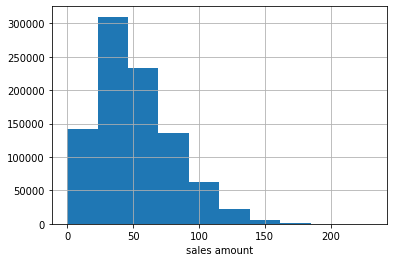

In [14]:
df.sale_amount.hist()
plt.xlabel('sales amount')

Text(0.5, 0, 'Item price')

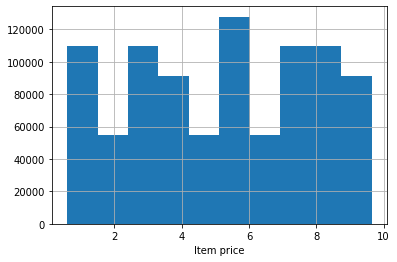

In [15]:
df.item_price.hist()
plt.xlabel('Item price')

#### Set the index to be the datetime variable. - Already done with csv import

#### Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [18]:
df['day_of_week'] = df.index.day_name()

In [22]:
df['month'] = df.index.month

In [32]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,day_of_week,month,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,1,10.92,NaN
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Wednesday,1,9.24,-1.68


#### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [26]:
df['sales_total'] = df.sale_amount * df.item_price

#### Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [31]:
df['sales_diff'] = df.sales_total.diff(1)

#### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

##### Convert date column to datetime format.

In [41]:
power = pd.read_csv('opsd_germany_daily.csv')

In [42]:
power.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [43]:
power['Date'] = pd.to_datetime(power['Date'])

In [44]:
power = power.sort_values('Date').set_index('Date')
power = power.iloc[:,1:]

In [45]:
power.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


#### Plot the distribution of each of your variables.

Text(0.5, 0, 'Consumption')

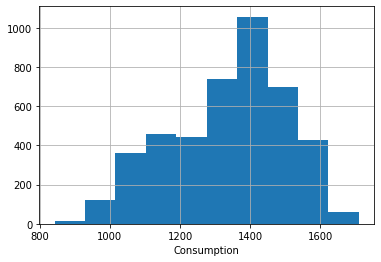

In [48]:
power.Consumption.hist()
plt.xlabel('Consumption')

Text(0.5, 0, 'wind')

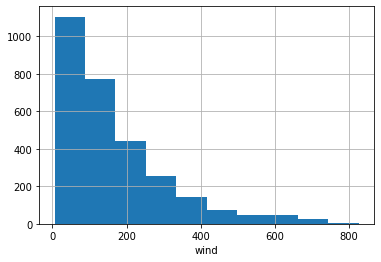

In [50]:
power.Wind.hist()
plt.xlabel('wind')

Text(0.5, 0, 'Solar')

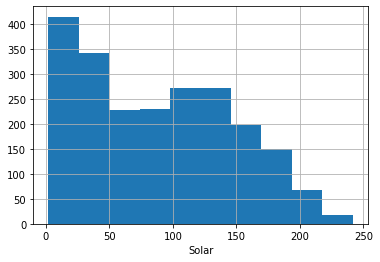

In [51]:
power.Solar.hist()
plt.xlabel('Solar')

Text(0.5, 0, 'Wind + Solar')

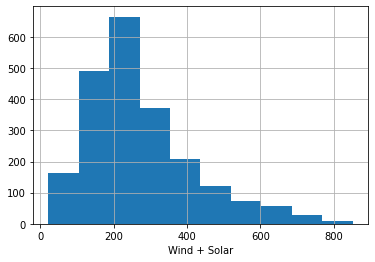

In [52]:
power['Wind+Solar'].hist()
plt.xlabel('Wind + Solar')

#### Add a month and a year column to your dataframe.
